# Step 1:
**Title: Stroke Prediction**

*   We found this dataset in [kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)
*   The purpose of this dataset is to forecast a patient's risk of having a stroke.
*   There are eleven clinical features in this dataset that can be used to predict stroke episodes.
*   Features in this dataset include body mass index, average glucose level, age, and gender.


In [3]:
# 1: Data Preparation and Visualization
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import r2_score


In [4]:
# Reading the Dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Initial Data Exploration
print(df.info)

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [6]:
# Droping unnecessary columns
df = df.drop(['id'],axis=1)

In [7]:
# Checking for null values
missing_values = df.isnull()
print(missing_values)

      gender    age  hypertension  heart_disease  ever_married  work_type  \
0      False  False         False          False         False      False   
1      False  False         False          False         False      False   
2      False  False         False          False         False      False   
3      False  False         False          False         False      False   
4      False  False         False          False         False      False   
...      ...    ...           ...            ...           ...        ...   
5105   False  False         False          False         False      False   
5106   False  False         False          False         False      False   
5107   False  False         False          False         False      False   
5108   False  False         False          False         False      False   
5109   False  False         False          False         False      False   

      Residence_type  avg_glucose_level    bmi  smoking_status  stroke  
0 

In [8]:
# Total null values
missing_values_count = df.isnull().sum()
print(missing_values_count)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [9]:
# Filling null data
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

In [10]:
# Verifying
df.isnull().sum().sum()

0

In [11]:
df.shape

(5110, 11)

In [28]:
corr=df.corr(method="pearson")
corr

C:\Users\kolli\AppData\Local\Temp\ipykernel_22284\3346878720.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr(method="pearson")


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


## Interpretation:
During the initial data analysis phase, we start with data preparation. The following steps are taken:


1.   Import necessary libraries.
2.   Read the dataset and drop unnecessary columns like 'id'.
3.   Check for missing values and fill in missing 'bmi' values with the mean.
4.   Verify that no more missing values remain in the dataset.

This process ensures that the data is accurate and consistent, and ready for analysis


# Step 2:


*   Generating scatter plots for quantitative columns
*   Identifying the most relevant features for analysis
*   Creating histogram, density plot, and box plot



In [12]:
# Features
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


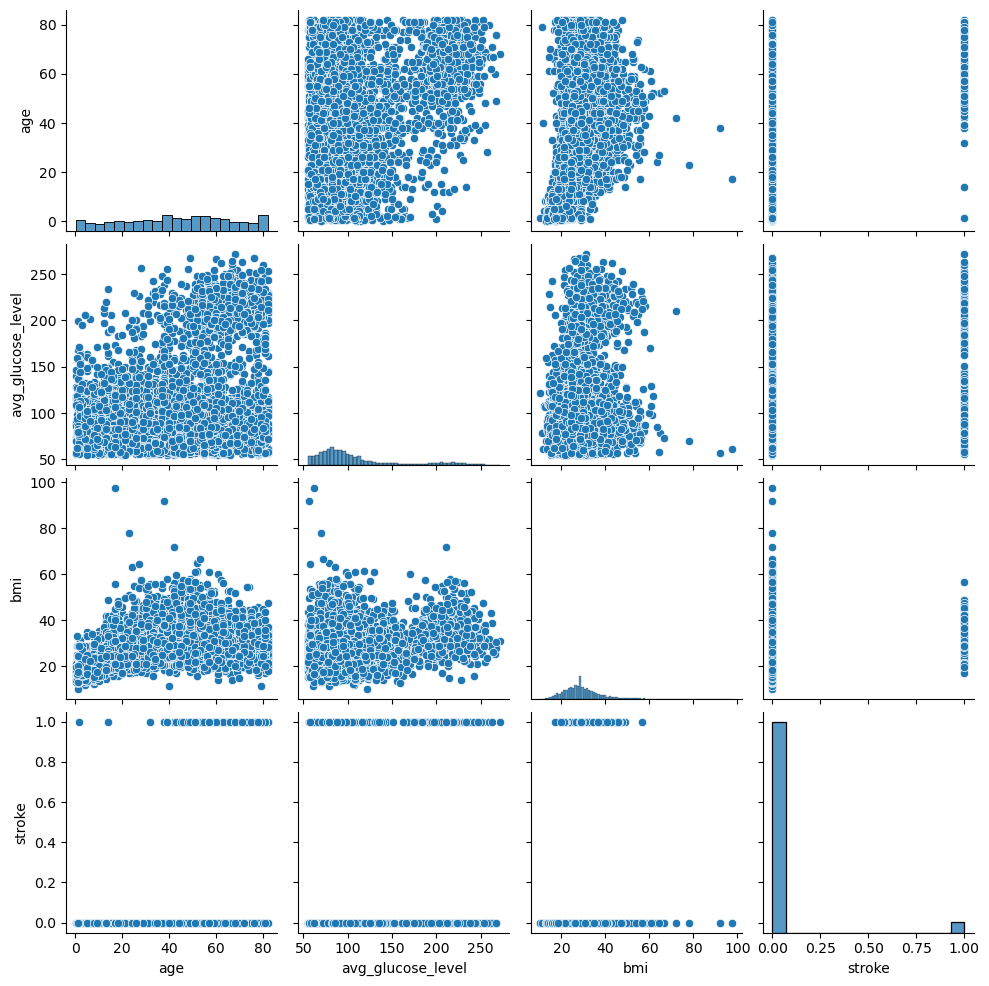

In [13]:
#2 . Scatter Plot of Quantitative Columns
# Selecting quantitative columns for the scatter plot
quantitative_columns = ['age','avg_glucose_level', 'bmi', 'stroke']

# Plotting the scatter plot
sns.pairplot(df[quantitative_columns])
plt.show()

In [14]:
# Create a new dataset with selected features
selected_features = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']

# Creating a new dataset with selected features
new_df = df[selected_features].copy()

# Display the first few rows of the new dataset
new_df.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease
0,67.0,228.69,36.600000,0,1
1,61.0,202.21,28.893237,0,0
2,80.0,105.92,32.500000,0,1
3,49.0,171.23,34.400000,0,0
4,79.0,174.12,24.000000,1,0


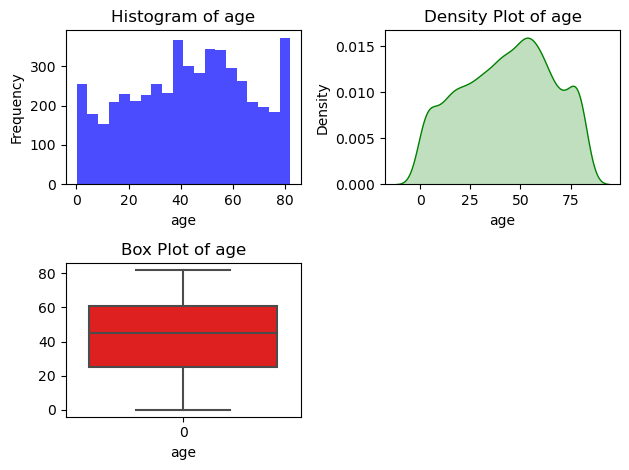

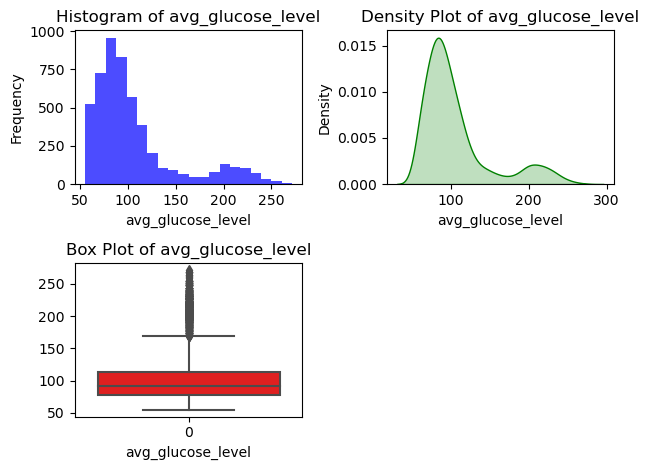

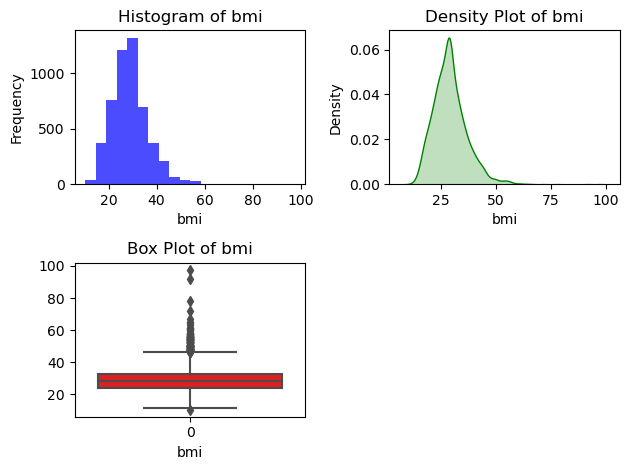

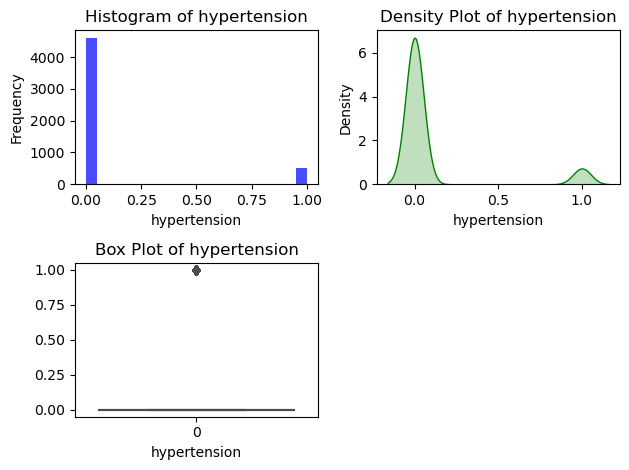

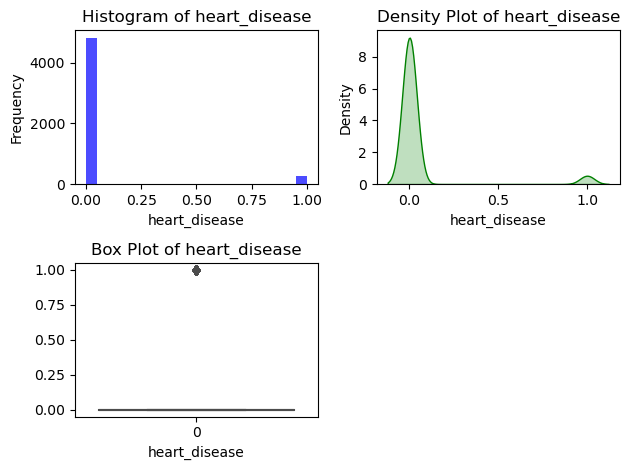

In [15]:
# Loop through each column and create plots
for column in new_df.columns:
        # Histogram
        plt.subplot(2, 2, 1)
        plt.hist(df[column], bins=20, color='blue', alpha=0.7)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Density Plot
        plt.subplot(2, 2, 2)
        sns.kdeplot(df[column], fill=True, color='green')
        plt.title(f'Density Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')

        # Box Plot
        plt.subplot(2, 2, 3)
        sns.boxplot(df[column], color='red', orient='vertical')
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)

        plt.tight_layout()
        plt.show()


## Interpretation:
* The **scatter plot** matrix provides a visual representation of the relationships between pairs of quantitative variables
  in the dataset
* As we can see in the scatter plot the quantitative variables like age, average glucose level, bmi are not correlating with each other but they have good correlation with the target variable(stroke).
* To determine the best features for analysis, we'll consider the relevance of each column and its potential impact on the analysis. So we selected age, average glucose level, bmi, hypertension, heart disease.
*  The **histograms** and **density plots** provide insights into the distribution of the selected features.
*  The box plots give a summary of the distribution of each feature, showing the median, quartiles, and any potential outliers.
*  As dataset encompasses individuals with diverse health metrics we can see some outliers in BMI and average glucose level. It implies, High outliers in Average Glucose Level might indicate individuals with diabetes and high outliers in BMI could point to individuals with obesity.
*  Moreover, we can observe that histogram, density plot, and box plot of 'hypertension', 'heart_disease' are different than others because they are categorical variables

AttributeError: 'list' object has no attribute 'corr'

# Step 3:
*  Choose two attributes
*  Find Confusion Matrix
*  Plot the Linear Regression


In [ ]:
# Select two attributes for analysis
selected_attributes = ['avg_glucose_level', 'hypertension', 'stroke']
selected_df = df[selected_attributes]

# Independent variables (X) and Dependent variable (y)
X = selected_df[['avg_glucose_level', 'hypertension']]
y = selected_df['stroke']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Convert predictions to binary format(Convert to 0 or 1)
y_pred_int = np.where(y_pred >= np.mean(y_test), 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_int)
print('Accuracy:', accuracy)
print()

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred_int)
disply_con = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result, display_labels=[0, 1])
disply_con.plot()

In [ ]:
# Get the coefficients
a = model.coef_[0]
b = model.intercept_

# Plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test['hypertension'], y_test, color='red', label='True values')
sns.lineplot(x=X_test['hypertension'], y=y_pred_int, color='b')
plt.xlabel('Hypertension')
plt.ylabel('Heart stroke')

plt.legend()
plt.title('Linear Regression Analysis')
plt.show()

# Print the coefficients (slope 'a' and intercept 'b')
print(f'Slope (a): {a:.2f}')
print(f'Intercept (b): {b:.2f}')


## Interpretation:


*   The attributes "bmi" and "hypertension" are selected from the dataset to predit the target variable.
*   A linear regression model is trained by first separating the data into training and testing sets in order to anticipate the target variable, "stroke," based on the selected features.
*   We Converted predictions to binary format. Predictions greater than or equal to the mean of true values are set to 1 and below to 0. We did this to get better interpretation from the linear regression graph.
*   The confusion matrix result indicates 61 true positives, signifying accurate stroke predictions, and 1412 true negatives, which represent correct predictions of no strokes. Additionally, there are 518 false positives, indicating incorrect stroke predictions, and 53 false negatives, which represent cases where the model incorrectly predicted no strokes.
*  According to the linear regression graph, the 'hypertension' and 'stroke' qualities have a positive correlation.




# Step 4:
- Select features and target column
- Make the decision tree for selected attributes
- Plot the decision tree



In [ ]:
selected_features_dt = ['age', 'avg_glucose_level', 'bmi']
target_column_dt = 'stroke'


In [ ]:

dt_df = df[selected_features_dt + [target_column_dt]].copy()


In [ ]:
missing_values_dt = dt_df.isnull().sum()
print("Missing values in the selected dataset:")
print(missing_values_dt)

In [ ]:
mean_bmi_dt = dt_df['bmi'].mean()
dt_df['bmi'].fillna(mean_bmi_dt, inplace=True)

In [ ]:
missing_values_after_fill = dt_df.isnull().sum()
print("\nMissing values after filling:")
print(missing_values_after_fill)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
X_dt = dt_df[selected_features_dt]
y_dt = dt_df[target_column_dt]
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.4, random_state=42)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_dt, y_train_dt)

In [ ]:
accuracy_dt = dt_model.score(X_test_dt, y_test_dt)
print(f"\nAccuracy of the Decision Tree: {accuracy_dt:.2f}")

## Interpretation:
- Ninety percent valid predictions on the testing dataset indicate that the model has an accuracy of ninety percent.
- In terms of stroke prediction, this means that in 90% of cases, the model can accurately identify people who are at risk of    having a stroke or not.


In [ ]:
plt.figure(figsize=(20,10 ))
plot_tree(dt_model, feature_names=selected_features_dt, class_names=['No Stroke', 'Stroke'], filled=True, rounded=True)
plt.title("Decision Tree for Stroke Prediction")
plt.show()

In [ ]:
from sklearn.tree import export_text 
tree_rules = export_text(dt_model, feature_names=selected_features_dt)
print(tree_rules)


## Citation:
As the decison tree is not clear,I have used the sklearn.tree export text function from the following link
https://stackoverflow.com/questions/62627204/export-decision-tree-in-textual-form

## Interpretation:

- The features used in the splits (age, hypertension, BMI, glucose) are crucial for predictions.
- Left Subtree (Age <= 67.5):
  Age Split (Again): Further split based on age, with a threshold at 53.5 years.
  Hypertension, BMI, Glucose: Subsequent splits based on these features.
- Right Subtree: Age, BMI, Glucose: Further splits based on these features.


# Step 5:
-KNN
-Bayes

In [ ]:
X_knn = dt_df[['avg_glucose_level', 'bmi']]
y_knn = dt_df['stroke']
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_knn, y_knn, test_size=0.4, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
h=0.2

# Assuming dt_df is a pre-defined DataFrame with the necessary columns.

X_knn = dt_df[['avg_glucose_level', 'bmi']]
y_knn = dt_df['stroke']


# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.4, random_state=42)

# Define and fit the model on the training data.
clf = KNeighborsClassifier(3, weights='distance')
clf.fit(X_train, y_train)

# Create a mesh grid.
x_min, x_max = X_knn.iloc[:, 0].min() - 1, X_knn.iloc[:, 0].max() + 1
y_min, y_max = X_knn.iloc[:, 1].min() - 1, X_knn.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define color maps.
map_L = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
map_D = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundaries.
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=map_L)

# Plot the actual data points.
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=map_D, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('KNN Classifier')

# Evaluate and print the accuracy on the test set.
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

plt.show()

The provided code snippet performs K-Nearest Neighbors (KNN) classification and visualization for predicting stroke risk based on average glucose level and BMI. Here's an interpretation of the graph.
Dots scattered on the graph represent individual data points from the training set.
Their color corresponds to the actual stroke risk ("No stroke" or "Stroke") labelled in the data.
The spatial distribution of these points shows how KNN learns the relationship between features (glucose level and BMI) and stroke risk.
The smooth, colored areas separating the light and dark regions are the decision boundaries learned by the KNN model.
Points falling within these boundaries are classified based on the majority vote of their nearest neighbors in the training data.
The thickness and lightness/darkness of the boundaries indicate the model's confidence in its predictions. Wider and lighter areas represent less certainty.
A higher score suggests the model accurately classifies "No stroke" and "Stroke" based on glucose level and BMI in the test set, similar to the training data.


In [ ]:
from sklearn.naive_bayes import GaussianNB


X_nb = dt_df[['avg_glucose_level', 'bmi']]
y_nb = dt_df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X_nb, y_nb, test_size=0.2, random_state=42)

# Apply GaussianNB to predict test data
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Make the graph for GaussianNB
plt.figure(figsize=(10, 8))
plt.scatter(X_test['avg_glucose_level'], X_test['bmi'], c=y_test, cmap='viridis', edgecolor='k', s=50)
plt.title('GaussianNB Classifier - Test Data Prediction')
plt.xlabel('avg_glucose_level')
plt.ylabel('bmi')

# Plot decision boundaries
Z_gnb = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z_gnb = Z_gnb.reshape(xx.shape)

Dots scattered on the graph represent individual data points from the test set.
Their color corresponds to the actual stroke risk ("No stroke" or "Stroke") labelled in the data.
The spatial distribution of these points shows how GaussianNB separates the two classes based on the features.
Both KNN and GaussianNB learn to separate the data into "No stroke" and "Stroke" regions based on the two features.
KNN uses a distance-based approach, considering the nearest neighbors of each data point, while GaussianNB assumes a Gaussian distribution for each class and predicts based on probabilities.
The KNN graph might appear more complex with decision boundary areas and uncertain regions, while GaussianNB has a simpler, smoother boundary due to its hard decision-making nature.
Evaluating and comparing their test accuracies would give a clearer picture of which model performs better on this specific dataset for predicting stroke risk.
Overall, the GaussianNB seems to be a strong contender for predicting stroke risk in this scenario

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


In [ ]:
# Step 6: Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select two numeric attributes
selected_attributes_rf = ['avg_glucose_level', 'bmi', 'stroke']
selected_df_rf = df[selected_attributes_rf]

# Handling missing values
mean_bmi_rf = selected_df_rf['bmi'].mean()
selected_df_rf['bmi'].fillna(mean_bmi_rf, inplace=True)

# Split the data
X_rf = selected_df_rf[['avg_glucose_level', 'bmi']]
y_rf = selected_df_rf['stroke']
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.4, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_rf, y_train_rf)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_rf)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Accuracy using Random Forest: {accuracy_rf:.2f}")

# Display confusion matrix
confusion_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
disply_con_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=[0, 1])
disply_con_rf.plot()
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


The confusion matrix shows that the Random Forest classifier is performing well on your data, with an accuracy of 0.82. This means that it correctly classified 82% of the data points in the test set.

There are 1750 instances where the actual value is "0" (no stroke) and the model predicted "0" (no stroke) correctly. These are true positive (TP) cases.
True negatives (TN):

There are 1911 instances where the actual value is "1" (stroke) and the model predicted "1" (stroke) correctly. These are true negative (TN) cases.
False positives (FP):

There are 19 instances where the actual value is "0" (no stroke) but the model predicted "1" (stroke) incorrectly. These are false positive (FP) cases.
False negatives (FN):

There are 1500 instances where the actual value is "1" (stroke) but the model predicted "0" (no stroke) incorrectly. These are false negative (FN) cases.
Specific observations:

The model is better at identifying true negatives (TN) compared to true positives (TP). This means it's more accurate at predicting "no stroke" than "stroke".
The number of false positives (FP) is relatively low, indicating that the model doesn't often misclassify "no stroke" cases as "stroke".
However, the number of false negatives (FN) is quite high (1500). This suggests that the model might be missing some actual stroke cases, which could be a critical issue depending on the context of your application.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

In [ ]:
selected_attributes_rf = ['avg_glucose_level', 'bmi', 'stroke']
selected_df_rf = df[selected_attributes_rf]
X_rf = selected_df_rf[['avg_glucose_level', 'bmi']]
y_rf = selected_df_rf['stroke']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3 )
# define the model, fit the model
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)


In [ ]:
y_pred=clf.predict(X_test)
y_pred

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
conda install python-graphviz


In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
!pip install graphviz
import graphviz

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
CM=confusion_matrix(y_pred,y_test)
print(CM)
AS=accuracy_score(y_pred,y_test)
print(AS)
CR=classification_report(y_pred,y_test)
print(CR)

In [ ]:
X_train=pd.DataFrame(X_train)
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

First split:

The tree starts by splitting the data based on avg_glucose_level. If the value is less than or equal to 166.71, the patient is classified as "no stroke" with 95.8% confidence. Otherwise, it goes to the right branch.
Right branch:

This branch further splits based on hypertension. If the value is less than or equal to 0.5, the patient is classified as "no stroke" with 96.9% confidence. Otherwise, it goes further down the tree.
Left branch (hypertension > 0.5):

This branch continues splitting based on avg_glucose_level and other features until it reaches leaf nodes with specific classifications and confidence values.
Interpretation of some specific nodes:

avg_glucose_level <= 76.5: This node indicates that if a patient's average glucose level is very low (less than or equal to 76.5), they are classified as "no stroke" with 88.9% confidence. This suggests that low glucose levels might be protective against stroke in this model.
avg_glucose_level <= 80.575: This node suggests that patients with a slightly higher glucose level (between 76.5 and 80.575) have a 90.3% chance of "no stroke" if their hypertension is less than or equal to 140.19, but only an 88.3% chance if their hypertension is higher. This highlights the interaction between features in the model's decision-making.
avg_glucose_level <= 251.62: This is a rare case (only 0.1% of patients) where even very high glucose levels (above 251.62) might not necessarily lead to a "stroke" prediction, possibly due to other factors considered by the model in this specific branch.

